<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week03_2_datatime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12 시계열 데이터

# 12-1 data 오브젝트

datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리이다. datetime 라이브러리에는 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함되어 있다.

*참고: datetime 라이브러리에는 더 많은 오브젝트가 포함되어 있다.

In [46]:
# datetime 오브젝트를 사용하기 위해 datetime 라이브러리를 불러옴.
from datetime import datetime

# now, today 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있음.
now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2025-09-22 08:02:02.109820
2025-09-22 08:02:02.110013


다음은 datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달한 것이다. 각 변수를 출력하여 확인해 보면 입력한 시간을 바탕으로 datetime 오브젝트가 생성된 것을 알 수 있다.

In [47]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2025-09-22 08:02:03.574553
1970-01-01 00:00:00
1970-12-12 13:24:34


datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점이다. 다음은 두 datetime 오브젝트의 차이를 구현한 것이다.

In [48]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

diff2 = t2 - t1

print(diff2)
print(type(diff2))

20353 days, 8:02:03.574553
<class 'datetime.timedelta'>
-20354 days, 15:57:56.425447
<class 'datetime.timedelta'>


# datetime 오브젝트로 변환하기 - to_datetime 메서드

경우에 따라서는 시계열 데이터를 문자열로 저장해야 할 때도 있다. 하지만 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해 주어야 한다. 이번에는 to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환하는 방법에 대해 알아보겠다.

In [49]:
# 1. 먼저 ebola 데이터 집합을 불러온다.
import pandas as pd
import os

ebola = pd.read_csv('country_timeseries.csv')

# 2. ebola 데이터프레임을 보면 문자열로 저장된 Date 열이 있는 것을 알 수 있다.

print(ebola.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

3. to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있다. 다음과 같이 to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가한다.

In [50]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

4. 시간 형식 지정자(%d, %m, %y)와 기호(/, -)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있다.

In [51]:
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

print(test_df1)

test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15
  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


# 시간 형식 지정자

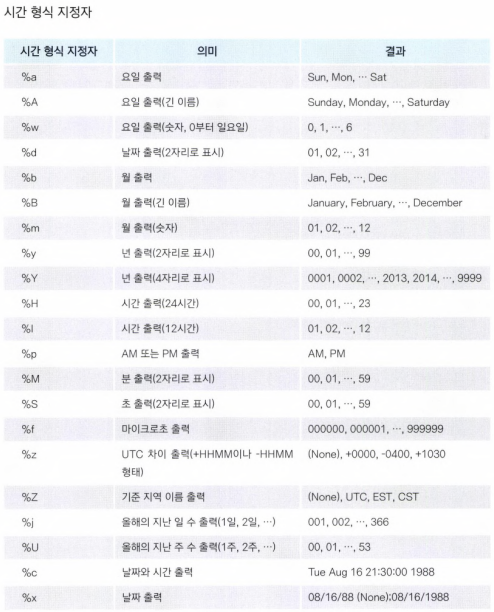
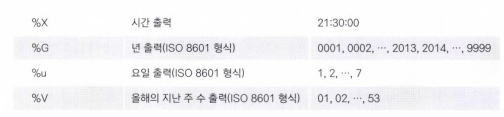

In [52]:
# strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라냄

now = datetime.now()
print(now)

nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H:%M:%S')
print(nowTime)

nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2025-09-22 08:02:30.983020
2025-09-22
08:02:30
2025-09-22 08:02:30


# datetime 오브젝트로 변환하기 - read_csv 메서드

datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

1. 다음은 read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것이다. 결과를 보면 Date 열이 문자열이 아닌 datetime 오브젝트임을 알 수 있다.


In [53]:
ebola1 = pd.read_csv('/content/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# datetime 오브젝트에서 날짜 정보 추출하기

datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보를 따로 저장하고 있는 속성이 이미 준비되어 있다.

1. 다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것이다.

In [54]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


2. datetime 오브젝트(d1)의 year, month, day 속성을 이용하면 년, 월, 일 정보를 바로 추출할 수 있다.

In [55]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


# dt 접근자 사용하기

문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 한다. datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다.

1. 먼저 ebola 데이터 집합을 불러온 다음 Date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)로 추가한다.

In [56]:
ebola = pd.read_csv('/content/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

2. 다음은 dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출한 것이다.

In [57]:
print(ebola[['Date','date_dt']].head())
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


3. 과정 2와 같은 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편하다. 다음은 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값을 추출한 것이다. 추출한 연도값은 ebola 데이터프레임의 새로운 열(year)로 추가했다.

In [58]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


4. 다음은 과정3을 응용하여 월, 일 데이터를 한 번에 추출해서 새로운 열(month, day)로 추가한 것이다.

In [59]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


5. 오른쪽은 ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 열의 자료형을 출력한 것이다. date_dt 열은 datetime 오브젝트이고 나머지는 정수형이다.

In [60]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 12-2 사례별 시계열 데이터 계산하기

에볼라 최초 발병일 계산하기

1. ebola 데이터프레임의 마지막 행과 열을 5개씩만 살펴보겠다. ebola 데이터프레임은 데이터가 시간 역순으로 정렬되어 있다. 즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 한다.

In [61]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


2. 121행에서 볼 수 있듯이 에볼라가 발생하기 시작한 날은 2014년 03월 22일이다. 다음은 min 메서드를 사용하여 에볼라의 최초 발병일을 찾은 것이다.

In [62]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


3. 에보라의 최초 발병일을 알아냈으니 Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다.

In [63]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


파산한 은행의 개수 계산하기

이번에는 파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산해 보겠다. 그래프로도 시각화해 보자.

1. 다음은 파산한 은행 데이터 집합을 불러온 것이다. banks 데이터프레임의 앞부분을 살펴보면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터라는 것을 알 수 있다.

In [65]:
banks = pd.read_csv('/content/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


2. Closing Date, Update Date 열의 데이터 자료형은 문자열이다. 다음은 read_csv 메서드의 parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러온 것이다.

In [66]:
banks_no_dates = pd.read_csv('/content/banklist.csv')
print(banks_no_dates.info())

banks = pd.read_csv('/content/banklist.csv',parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null 

/tmp/ipython-input-554215490.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/banklist.csv',parse_dates=[5,6])
/tmp/ipython-input-554215490.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/banklist.csv',parse_dates=[5,6])


3. dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있다. 다음은 dt 접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것이다.

In [67]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

4. 이제 연도별로 파산한 은행이 얼마나 되는지 알아보자. groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 알 수 있다.

In [68]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


5. 각 연도별, 분기별로 파산한 은행의 개수도 알아보자. 다음은 banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력한 것이다.

In [69]:
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

6. 다음은 과정 5에서 얻은 값으로 그래프를 그린 것이다.

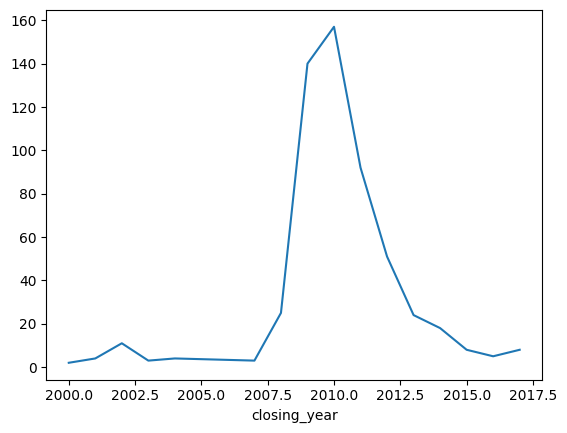

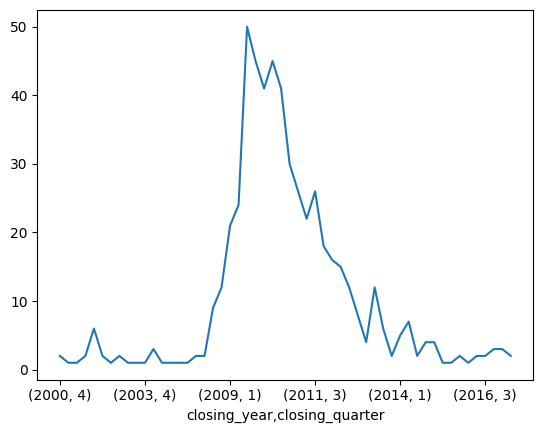

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

테슬라 주식 데이터로 시간 계산하기

이번에는 pandas-datareader 라이브러리를 이용하여 주식 데이터를 불러오겠다. 이 라이브러리는 지금까지 설치한 적이 없는 라이브러리이다. 다음을 아나콘다 프롬포트에 입력하여 pandas-datareader 라이브러리를 설치하자.

In [71]:
pip install pandas-datareader

1. 다음은 get_data_quanal 메서드에 TSLA라는 문자열을 전달하여 테슬라의 주식 데이터를 내려받은 다음 to_csv 메서드를 사용하여 data 폴더 안에 'tesla_stock_quandl.csv'라는 이름으로 저장한 것이다.

In [72]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

# tesla에는 데이터 프레임이 저장됩니다.
# tesla=pdr.get_data_quandl('TSLA', api_key = '받은 key')

# tesla에 저장된 데이터 프레임을 파일로 저장합니다.
# tesla.to_csv('../data/tesla_stock_quandl.csv')

tesla = pd.read_csv('/content/tesla_stock_quandl.csv')

2. tesla 데이터프레임의 Date 열은 문자열로 저장되어 있다. 즉, datetime 오브젝트로 자료형을 변환해야 시간 계산을 할 수 있다.

In [73]:
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


3. Date 열을 Datetime 형으로 변환하려면 read_csv 메서드로 데이터 집합(tesla_stock_quandl.csv)을 불러올 때 parse_dates 인자에 Date 열을 전달하면 된다.

In [74]:
tesla = pd.read_csv('/content/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


4. Date 열의 자료형이 datetime 오브젝트로 변환되었다. 이제 dt 접근자를 사용할 수 있다. 다음은 불린 추출로 2010년 6월의 데이터만 추출한 것이다.

In [75]:
print(tesla.loc[(tesla.Date.dt.year==2010)&(tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


# datetime 오브젝트와 인덱스 - DatetimeIndex

지금까지는 데이터프레임의 행 번호를 인덱스로 사용했지만 datetime 오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리하다.

1. 계속해서 테슬라 주식 데이터를 사용하여 실습을 진행하겠다. 다음은 Date 열을 tesla 데이터프레임의 인덱스로 지정한 것이다.

In [76]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


2. datetime 오브젝트를 인덱스로 지정하면 다음과 같은 방법으로 원하는 시간의 데이터를 바로 추출할 수 있다. 다음은 2015년의 데이터를 추출한 것이다.

In [81]:
print(tesla.loc['2015'].iloc[:5,:5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


3. 다음은 2010년 6월의 데이터를 추출한 것이다.

In [82]:
print(tesla.loc['2010-06'].iloc[:,:5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


# 시간 간격과 인덱스 - TimedeltaIndex

예를 들어 주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶다면 어떻게 해야 할까? 이런 경우에는 시간 간격을 인덱스로 지정하여 데이터를 추출하면 된다. 이번에는 datetime 오브젝트를 인덱스로 지정하는 것이 아니라 시간 간격을 인덱스로 지정하여 진행하자.

1. Date 열에서 Date 열의 최솟값(2010-06-29)을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있다. 다음은 Date 열에서 Date 열의 최솟값을 뺀 다음 ref_date 열로 추가한 것이다.

In [53]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

        Date    Open    High     Low   Close      Volume  ExDividend  \
0 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  ref_date  
0         1.0   304.00   304.27  277.18    279.18  13696168.0 2828 days  
1         1.0   307.34   307.59  291.36    304.18   8324639.0 2827 days  
2         1.0   311.25   311.61  300.45    301.54   6600538.0 2824 days  
3         1.0   313.89   318.82  308.18    309.10   4914307.0 2823 days  
4         1.0   310.25   322.44  310.19    316.53   5927881.0 2822 days  


2. 다음과 같이 ref_date 열을 인덱스로 지정했다. 이제 시간 간격(ref_date)을 이용하여 데이터를 추출할 수 있다.

In [98]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5,:5])

KeyError: 'ref_date'

3. 다음은 데이터를 수집한 이후 최초 5일의 데이터를 추출한 것이다.

In [99]:
print(tesla['5 days':].iloc[:5,:5])

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [5 days] of type str

# 시간 범위와 인덱스

시간 범위 생성해 인덱스로 지정하기

1. 에볼라 데이터 집합의 가장 앞쪽을 살펴보면 2015년 01년 01일의 데이터가 누락된 것을 알 수 있다.

In [10]:
ebola = pd.read_csv('/content/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


2. 뒤쪽의 데이터도 마찬가지이다. 2014년 03월 23일의 데이터가 누락되었다.

In [11]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


3. 다음은 date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 01월 05일 사이의 시간 인덱스(DatetimeIndex)를 생성한 것이다.

In [12]:
head_range = pd.date_range(start='2014-12-31', end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


4. 다음은 원본 데이터를 손상시키는 것을 방지하기 위해 ebola 데이터프레임의 앞쪽 5개의 데이터를 추출하여 새로운 데이터프레임을 만든 것이다. 이때 Date 열을 인덱스로 지정한 다음 과정 3에서 생성한 시간 범위를 인덱스로 지정해야 한다.

In [15]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


# 시간 범위의 주기 설정하기

시간 범위를 인덱스를 지정하면 DatetimeIndex 자료형이 만들어진다. 그리고 DatetimeIndex에는 freq 속성이 포함되어 있다. freq 속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있다.

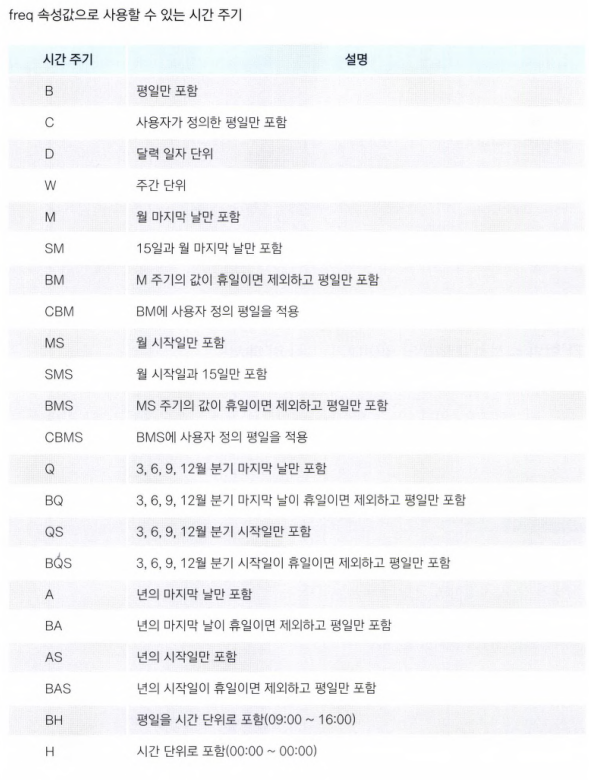

다음은 date_range 메서드의 freq 인잣값을 B로 설정하여 평일만 포함시킨 DatetimeIndex를 만든 것이다.

In [16]:
print(pd.date_range('2017-01-01','2017-01-07',freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


# 시간 범위 수정하고 데이터 밀어내기 - shift 메서드

만약 나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋다. 일단 ebola 데이터프레임으로 그래프를 그려보고 에볼라의 확산 속도를 비교하는 데 어떤 문제가 있는지 그리고 해결 방법은 무엇인지 알아보자.

1. 다음은 ebola 데이터프레임의 Date 열을 인덱스로 지정한 다음 x축을 Date 열로, y축을 사망자 수로 지정하여 그린 그래프이다.


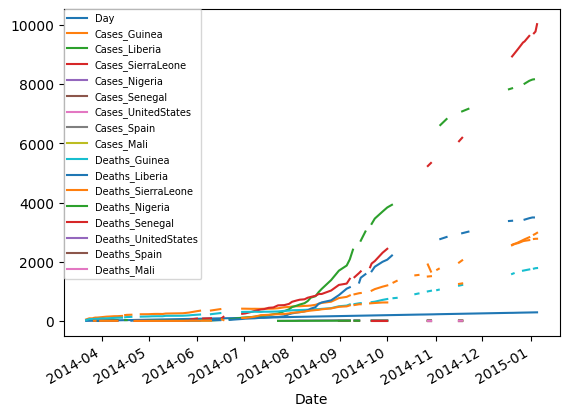

In [18]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)

ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

2. 그런데 과정 1의 그래프는 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점도 다르다. 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있다.

In [19]:
ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


3. 그래프를 그리기 위한 데이터프레임 준비하기

다음은 Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생성한 것이다. 그런데 중간에 아예 날짜가 없는 데이터(2015년 01월 01일)도 있다. 이 데이터도 포함시켜야 확산 속도를 제대로 비교할 수 있다.

In [22]:
ebola = pd.read_csv('/content/country_timeseries.csv',parse_dates=['Date'])

print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


4. 다음은 Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장한 것이다. 이렇게 하면 날자가 아예 없었던 데이터의 인덱스를 생성할 수 있다.

In [23]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(),ebola.index.max())

5. 그런데 new_idx를 살펴보면 ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어 있다. 다음은 시간 순서를 맞추기 위해 reversed 메서드를 사용하여 인덱스를 반대로 뒤집은 것이다.

In [25]:
print(new_idx)
new_idx = reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


6. 다음은 reindex 메서드를 사용하여 새로 생성한 인덱스(new_idx)를 새로운 인덱스로 지정한 것이다. 그러면 2015년 01월 01일 데이터와 같은 ebola 데이터프레임에 아예 없었던 날짜가 추가된다.

In [38]:
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

Empty DataFrame
Columns: [Date, Day, Cases_Guinea, Cases_Liberia, Cases_SierraLeone]
Index: []
Empty DataFrame
Columns: [Date, Day, Cases_Guinea, Cases_Liberia, Cases_SierraLeone]
Index: []


7. 각 나라의 에볼라 발병일 옮기기

다음은 last_valid_index, first_valid_index 메서드를 사용하여 각 나라의 에볼라 발병일을 구한 것이다. 각각의  메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환한다.

In [37]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  NaN
Day                   NaN
Cases_Guinea          NaN
Cases_Liberia         NaN
Cases_SierraLeone     NaN
Cases_Nigeria         NaN
Cases_Senegal         NaN
Cases_UnitedStates    NaN
Cases_Spain           NaN
Cases_Mali            NaN
Deaths_Guinea         NaN
Deaths_Liberia        NaN
Deaths_SierraLeone    NaN
Deaths_Nigeria        NaN
Deaths_Senegal        NaN
Deaths_UnitedStates   NaN
Deaths_Spain          NaN
Deaths_Mali           NaN
dtype: float64
Date                  NaN
Day                   NaN
Cases_Guinea          NaN
Cases_Liberia         NaN
Cases_SierraLeone     NaN
Cases_Nigeria         NaN
Cases_Senegal         NaN
Cases_UnitedStates    NaN
Cases_Spain           NaN
Cases_Mali            NaN
Deaths_Guinea         NaN
Deaths_Liberia        NaN
Deaths_SierraLeone    NaN
Deaths_Nigeria        NaN
Deaths_Senegal        NaN
Deaths_UnitedStates   NaN
Deaths_Spain          NaN
Deaths_Mali           NaN
dtype: float64


8. 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날(erliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values)만 옮기면 된다.

In [86]:
earliest_date = ebola.index.min()
print(earliest_date)

shift_values = last_valid - earliest_date
print(shift_values)

0
Date                  NaN
Day                   NaN
Cases_Guinea          NaN
Cases_Liberia         NaN
Cases_SierraLeone     NaN
Cases_Nigeria         NaN
Cases_Senegal         NaN
Cases_UnitedStates    NaN
Cases_Spain           NaN
Cases_Mali            NaN
Deaths_Guinea         NaN
Deaths_Liberia        NaN
Deaths_SierraLeone    NaN
Deaths_Nigeria        NaN
Deaths_Senegal        NaN
Deaths_UnitedStates   NaN
Deaths_Spain          NaN
Deaths_Mali           NaN
dtype: float64


9. 이제 각 나라의 에볼라 발병일을 옮기면 된다. 다음은 shift 메서드를 사용하여 모든 열의 값을 shift_vlaues값만큼 옮긴 것이다. shift 메서드는 인잣값만큼 데이터를 밀어내는 메서드이다.

In [100]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

/tmp/ipython-input-1533768380.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


AttributeError: 'numpy.float64' object has no attribute 'days'

10. ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있다. 다음은 DataFrame 메서드를 사용하여 ebola_dict의 값을 데이터프레임으로 변환한 것이다.

In [40]:
ebola_shift = pd.DataFrame(ebola_dict)

11. 이제 에볼라의 최초 발병일(2014-03-22)을 기준으로 모든 열의 데이터가 옮겨졌다.

In [41]:
print(ebola_shift.tail())

Empty DataFrame
Columns: []
Index: []


12. 마지막으로 인덱스를 Day 열로 지정하고 그래프에 필요 없는 Date, Day 열은 삭제하면 그래프를 그리기 위한 데이터프레임이 완성된다.

In [94]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'],axis=1)

print(ebola_shift.tail())

KeyError: 'Day'

13. 다음은 지금까지 만든 데이터프레임으로 다시 그린 그래프이다.

TypeError: no numeric data to plot

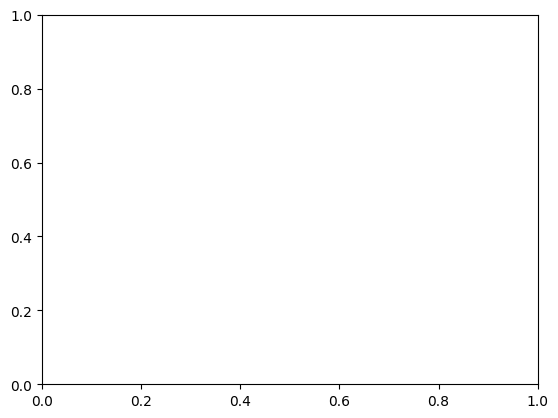

In [101]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()